In [1]:
options(stringsAsFactors=FALSE)

In [2]:
library(data.table)
library(cowplot)
library(Matrix)
library(BuenColors)

Loading required package: ggplot2

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave

Loading required package: MASS


In [3]:
metrics_pctcells = read.csv('./peaks_frequency_results/metrics/clustering_scores.csv',
                         row.names=1)
metrics_pctcells[['cutoff']] = as.numeric(substring(rownames(metrics_pctcells),8))

metrics_nreads = read.csv('./peaks_intensity_results/metrics/clustering_scores.csv',
                         row.names=1)
metrics_nreads[['cutoff']] = as.numeric(substring(rownames(metrics_pctcells),8))

In [4]:
head(metrics_nreads)

,ARI_Louvain,ARI_kmeans,ARI_HC,AMI_Louvain,AMI_kmeans,AMI_HC,Homogeneity_Louvain,Homogeneity_kmeans,Homogeneity_HC,cutoff
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
control1,0.9616606,0.7987878,0.8048140,0.9622845,0.8694853,0.8770687,0.9624135,0.8682751,0.8667455,1.0
control0.8,0.9194797,0.7973579,0.8368965,0.9346157,0.8675927,0.9012362,0.9344704,0.8681397,0.8915259,0.8
control0.6,0.9457715,0.7978297,0.7968254,0.9530579,0.8680957,0.8650337,0.9528876,0.8682344,0.8658198,0.6
control0.4,0.9653065,0.8135234,0.8494934,0.9642729,0.8751490,0.8966210,0.9644708,0.8757965,0.8949007,0.4
control0.2,0.8930208,0.7978006,0.8118402,0.9185878,0.8676763,0.8839369,0.9183393,0.8684005,0.8710381,0.2
control0.1,0.7438295,0.5871556,0.6444035,0.8108892,0.7443403,0.7646059,0.8113052,0.7231259,0.7433734,0.1


In [5]:
head(metrics_pctcells)

,ARI_Louvain,ARI_kmeans,ARI_HC,AMI_Louvain,AMI_kmeans,AMI_HC,Homogeneity_Louvain,Homogeneity_kmeans,Homogeneity_HC,cutoff
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
control1,0.9616606,0.7987878,0.8048140,0.9622845,0.8694853,0.8770687,0.9624135,0.8682751,0.8667455,1.0
control0.8,0.9322761,0.7985335,0.8686411,0.9424489,0.8682418,0.9205593,0.9424292,0.8686471,0.9141578,0.8
control0.6,0.9671591,0.7987353,0.9191415,0.9671419,0.8697195,0.9304217,0.9672206,0.8681285,0.9307943,0.6
control0.4,0.9690093,0.7984695,0.7911411,0.9684320,0.8679796,0.8601663,0.9685244,0.8687151,0.8607683,0.4
control0.2,0.8771505,0.8044617,0.7987268,0.9092412,0.8701766,0.8696368,0.9090547,0.8690001,0.8533577,0.2
control0.1,0.7327553,0.6432728,0.6275463,0.8089777,0.7668225,0.7504931,0.8095854,0.7472689,0.7291244,0.1


In [6]:
df_merge = rbind(metrics_pctcells,metrics_nreads)

In [7]:
df_merge[['group']] = c(rep('Fequency',dim(metrics_pctcells)[1]),rep('Intensity',dim(metrics_nreads)[1]))

In [8]:
df_merge[['ID']] = rownames(df_merge)

In [9]:
df_merge_new = data.frame(name=character(0),group= character(0), clustering= character(0), 
                          metric = character(0),value = numeric(0),cutoff=numeric(0),stringsAsFactors=FALSE)

In [10]:
for(x in rownames(df_merge)){
    for (y in colnames(df_merge)[1:9]){
        str_split = strsplit(y,'_')[[1]]
        x_metric = str_split[1]
        x_clustering = str_split[2]
        x_value = df_merge[x,y]
        new_row = list(name=x,group=df_merge[x,'group'],clustering=x_clustering,
                       metric=x_metric,value=x_value,cutoff=df_merge[x,'cutoff'])
        df_merge_new = rbind(df_merge_new,new_row)
    }
}

In [11]:
df_merge_new[df_merge_new=="louvain"]<-'Louvain'
df_merge_new[df_merge_new=="hc"]<-'HC'

In [12]:
df_merge_new

name,group,clustering,metric,value,cutoff
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
control1,Fequency,Louvain,ARI,0.9616606,1.0
control1,Fequency,kmeans,ARI,0.7987878,1.0
control1,Fequency,HC,ARI,0.8048140,1.0
control1,Fequency,Louvain,AMI,0.9622845,1.0
control1,Fequency,kmeans,AMI,0.8694853,1.0
control1,Fequency,HC,AMI,0.8770687,1.0
control1,Fequency,Louvain,Homogeneity,0.9624135,1.0
control1,Fequency,kmeans,Homogeneity,0.8682751,1.0
control1,Fequency,HC,Homogeneity,0.8667455,1.0


In [13]:
min(df_merge_new$value)

[1] 0.4762659

In [14]:
p <- ggplot(df_merge_new, aes(cutoff, value,color=factor(group))) + 
        geom_point(size=2,alpha=0.8)+
        geom_line(size=1.5,alpha=0.8) + 
        theme_bw() +
        theme(legend.position='top',
              text = element_text(colour = "black"),
              axis.text.x = element_text(color = "black"),
              axis.text.y = element_text(color = "black"),
              axis.title.x = element_text(color = 'black'),
              axis.title.y = element_text(color = 'black')) +
        xlab('Cutoff') + ylab('Score')+
        ylim(-0.05, 1)+
        labs(color='peak selection')+
        scale_x_reverse()

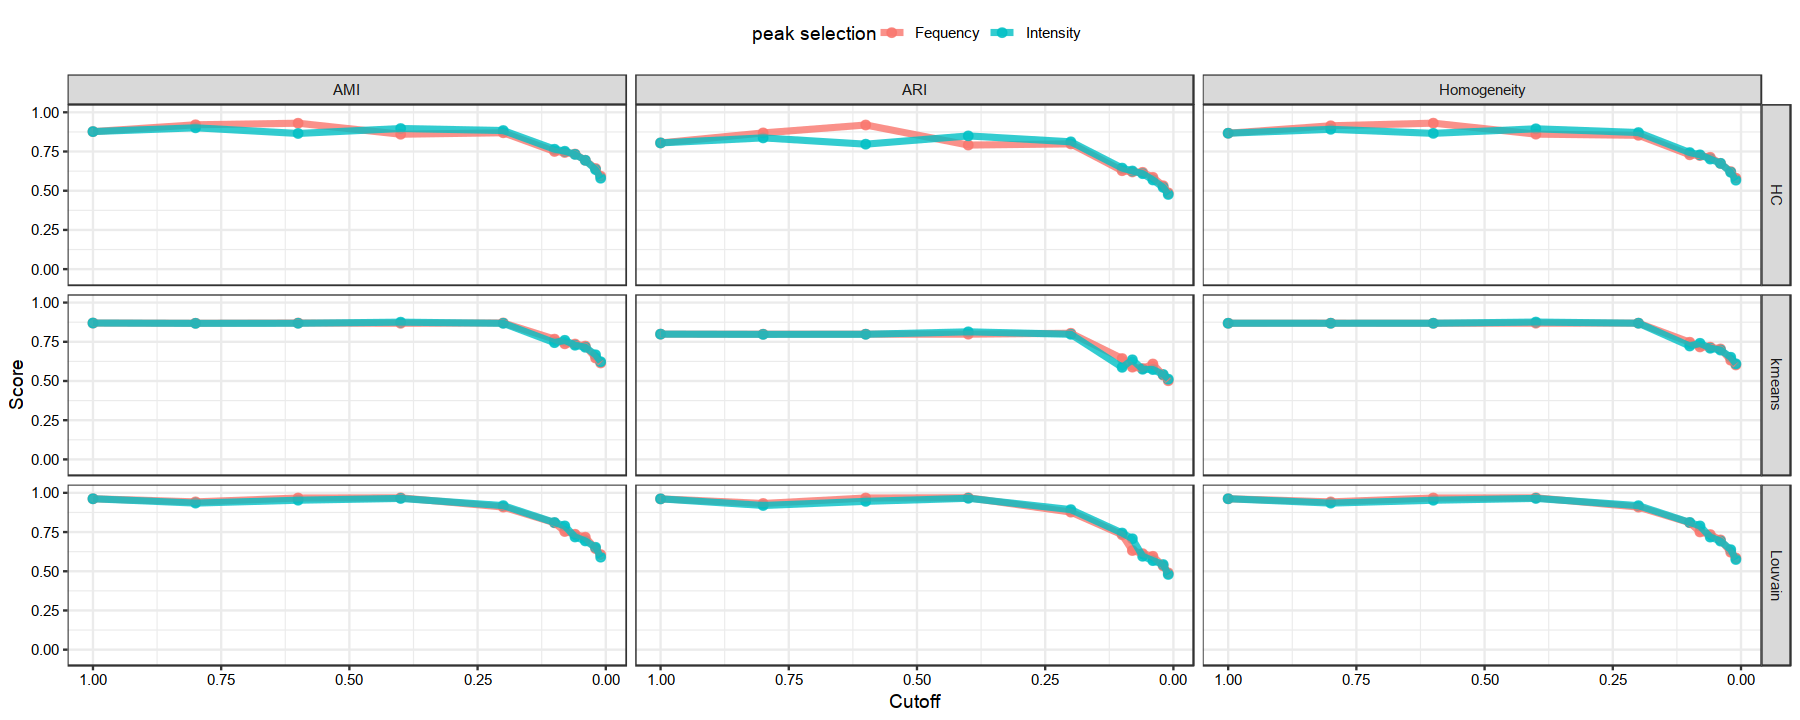

In [23]:
options(repr.plot.width=3*5, repr.plot.height=3*2)
p + facet_grid(vars(clustering), vars(metric))

In [24]:
ggsave(p + facet_grid(vars(clustering), vars(metric)),filename = 'Control_BMp2.pdf',width = 3*5, height = 3*2)